## Importing Data

In [1]:
# Set up
import pandas as pd

# for plots
#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

# View max columns
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.0f}'.format) #Causes pandas do NOT output integers as exponents

In [2]:
# 1) Figure out the location of this script or notebook:
from pathlib import Path

BASE_DIR = Path.cwd()  # The current working directory is the repository root
# 2) Point to your data folders:
DATA_DIR = BASE_DIR / "Data Files"
GEO_DIR = BASE_DIR / "GeoFiles"

# Create df of the final CSV
csv_name = "one_df_to_rule_them_all.csv"
df = pd.read_csv(DATA_DIR / csv_name)

## Information on the DF

In [3]:
# Viewing the DF
print("Dimensions of the DF:",df.shape)

print("Column names:",df.columns.to_list())

df.head()

Dimensions of the DF: (8269, 39)
Column names: ['GEOID20', 'ACS_PCT_CTZ_US_BORN', 'ACS_PCT_FOREIGN_BORN', 'ACS_PCT_WHITE', 'ACS_PCT_NONHISP', 'ACS_MEDIAN_HH_INC', 'ACS_PCT_OWNER_HU', 'ACS_PCT_OWNER_HU_COST_30PCT', 'ACS_PCT_RENTER_HU', 'ACS_PCT_RENTER_HU_COST_30PCT', 'ACS_PCT_VACANT_HU', 'ACS_PCT_UNEMPLOY', 'ACS_PCT_UNINSURED', 'ACS_PCT_PERSON_INC_BELOW99', 'ACS_GINI_INDEX', 'PCT_EDUCATION_WT_AVG', 'CASTHMA_PCT', '1st Max Value', 'RPL_THEMES', 'EP_LIMENG', 'UA_POP', 'STATEFP20', 'COUNTYFP20', 'TRACTCE20', 'NAME20', 'NAMELSAD20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20', 'AWATER20', 'INTPTLAT20', 'INTPTLON20', 'POP100', 'HU100', 'geometry', 'FIPS', 'TCRPM', 'Total Cancer Risk (per million)', 'TOT_CRIME_P1K']


GEOID20  ACS_PCT_CTZ_US_BORN  ACS_PCT_FOREIGN_BORN  ACS_PCT_WHITE  \
0  49001100100                   95                     5             96   
1  49001100100                   95                     5             96   
2  49001100200                   89                    11             89   
3  49001100200                   89                    11             89   
4  49003960100                   97                     3             97   

   ACS_PCT_NONHISP  ACS_MEDIAN_HH_INC  ACS_PCT_OWNER_HU  \
0               91              67411                83   
1               91              67411                83   
2               84              61359                80   
3               84              61359                80   
4               98              67297                90   

   ACS_PCT_OWNER_HU_COST_30PCT  ACS_PCT_RENTER_HU  \
0                            9                 17   
1                            9                 17   
2                           12                 20   
3                           12                 20   
4                           15                 10   

   ACS_PCT_RENTER_HU_COST_30PCT  ACS_PCT_VACANT_HU  ACS_PCT_UNEMPLOY  \
0                            30                 31                 1   
1                            30                 31                 1   
2                            31                 22                 6   
3                            31                 22                 6   
4                            38                 23                 1   

   ACS_PCT_UNINSURED  ACS_PCT_PERSON_INC_BELOW99  ACS_GINI_INDEX  \
0                 13                           3               0   
1                 13                           3               0   
2                  8                           5               0   
3                  8                           5               0   
4                  9                           9               0   

   PCT_EDUCATION_WT_AVG  CASTHMA_PCT  1st Max Value  RPL_THEMES  EP_LIMENG  \
0                     3            0            NaN           1          2   
1                     3            0            NaN           1          2   
2                     3            0            NaN           1          3   
3                     3            0            NaN           1          3   
4                     3            0            NaN           0          0   

   UA_POP  STATEFP20  COUNTYFP20  TRACTCE20  NAME20    NAMELSAD20 MTFCC20  \
0     NaN         49           1     100100    1001  Census Tract   G5020   
1     NaN         49           1     100100    1001  Census Tract   G5020   
2     NaN         49           1     100200    1002  Census Tract   G5020   
3     NaN         49           1     100200    1002  Census Tract   G5020   
4     392         49           3     960100    9601  Census Tract   G5020   

  FUNCSTAT20     ALAND20   AWATER20  INTPTLAT20  INTPTLON20  POP100  HU100  \
0          S  1357843756     830378          38        -113    4426   1804   
1          S  1357843756     830378          38        -113    4426   1804   
2          S  5331838094    4468088          38        -113    2646   1059   
3          S  5331838094    4468088          38        -113    2646   1059   
4          S 13531188545 2288660990          42        -113    3498   1311   

                                            geometry   FIPS  TCRPM  \
0  POLYGON ((-112.79486553632984 38.2998297242319...  49001     10   
1  POLYGON ((-112.79486553632984 38.2998297242319...  49001     10   
2  POLYGON ((-114.05052680376753 38.4965336584998...  49001     10   
3  POLYGON ((-114.05052680376753 38.4965336584998...  49001     10   
4  POLYGON ((-114.0420281204439 41.0015679339631,...  49003    100   

   Total Cancer Risk (per million)  TOT_CRIME_P1K  
0                               10             62  
1                               10             62  
2                               10             62  
3   

In [4]:
# Print structure and summary of the DataFrame
print("=== DataFrame Info ===")
df.info()

print("\n=== DataFrame Description ===")
display(df.describe(include='all'))  # Include all column types

# pull number of census tracts
if 'GEOID20' in df.columns:
    print(f"\nNumber of unique census tracts: {df['GEOID20'].nunique()}")

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8269 entries, 0 to 8268
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   GEOID20                          8269 non-null   int64  
 1   ACS_PCT_CTZ_US_BORN              8202 non-null   float64
 2   ACS_PCT_FOREIGN_BORN             8202 non-null   float64
 3   ACS_PCT_WHITE                    8202 non-null   float64
 4   ACS_PCT_NONHISP                  8202 non-null   float64
 5   ACS_MEDIAN_HH_INC                8172 non-null   float64
 6   ACS_PCT_OWNER_HU                 8188 non-null   float64
 7   ACS_PCT_OWNER_HU_COST_30PCT      8123 non-null   float64
 8   ACS_PCT_RENTER_HU                8188 non-null   float64
 9   ACS_PCT_RENTER_HU_COST_30PCT     8140 non-null   float64
 10  ACS_PCT_VACANT_HU                8188 non-null   float64
 11  ACS_PCT_UNEMPLOY                 8188 non-null   float64
 1

GEOID20  ACS_PCT_CTZ_US_BORN  ACS_PCT_FOREIGN_BORN  ACS_PCT_WHITE  \
count         8269                 8202                  8202           8202   
unique         NaN                  NaN                   NaN            NaN   
top            NaN                  NaN                   NaN            NaN   
freq           NaN                  NaN                   NaN            NaN   
mean   49038298359                   90                    10             85   
std       13388768                    7                     7             13   
min    49001100100                   58                     0              1   
25%    49035111002                   87                     5             81   
50%    49035113539                   92                     8             88   
75%    49049003104                   95                    13             93   
max    49057211202                  100                    42            100   

        ACS_PCT_NONHISP  ACS_MEDIAN_HH_INC  ACS_PCT_OWNER_HU  \
count              8202               8172              8188   
unique              NaN                NaN               NaN   
top                 NaN                NaN               NaN   
freq                NaN                NaN               NaN   
mean                 85              80852                70   
std                  12              28744                24   
min                  39              22367                 0   
25%                  80              60375                57   
50%                  89              76452                77   
75%                  94              97967                89   
max                 100             250001               100   

        ACS_PCT_OWNER_HU_COST_30PCT  ACS_PCT_RENTER_HU  \
count                          8123               8188   
unique                          NaN                NaN   
top                             NaN                NaN   
freq                            NaN                NaN   
mean                             20                 30   
std                               9                 24   
min                               0                  0   
25%                              15                 11   
50%                              19                 23   
75%                              23                 43   
max                             100                100   

        ACS_PCT_RENTER_HU_COST_30PCT  ACS_PCT_VACANT_HU  ACS_PCT_UNEMPLOY  \
count                           8140               8188              8188   
unique                           NaN                NaN               NaN   
top                              NaN                NaN               NaN   
freq                             NaN                NaN               NaN   
mean                              43                  6                 4   
std                               19                  8                 2   
min                                0                  0                 0   
25%                               31                  1                 2   
50%                               43                  4                 3   
75%                               55                  7                 5   
max                              100                 97                26   

        ACS_PCT_UNINSURED  ACS_PCT_PERSON_INC_BELOW99  ACS_GINI_INDEX  \
count                8188                        8188            8172   
unique                NaN                         NaN             NaN   
top                   NaN                         NaN             NaN   
freq                  NaN                         NaN             NaN   
mean                    9                          10               0   
std                     7                          10               0   
min                     0                           0               0   
25%                     4                           3               0   
50


Number of unique census tracts: 716


## Missing values

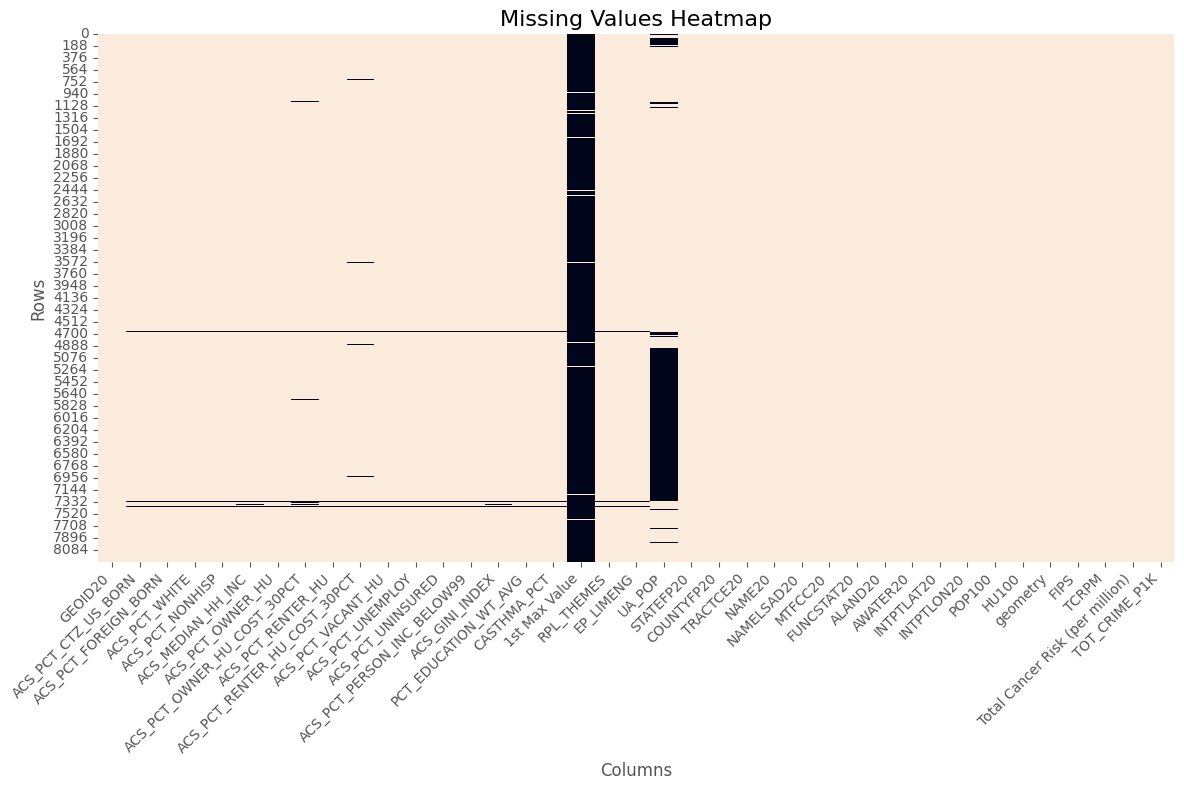

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 8))

# Plot missing values heatmap
sns.heatmap(df.isnull(), cbar=False, cmap="rocket_r")

# Add title and labels with fontsize
plt.title("Missing Values Heatmap", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)

# Rotate column labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

In [6]:
# Count of missing values per column
df.isnull().sum().sort_values(ascending=False)

1st Max Value                      8103
UA_POP                             2698
ACS_PCT_OWNER_HU_COST_30PCT         146
ACS_PCT_RENTER_HU_COST_30PCT        129
ACS_MEDIAN_HH_INC                    97
ACS_GINI_INDEX                       97
ACS_PCT_OWNER_HU                     81
ACS_PCT_PERSON_INC_BELOW99           81
ACS_PCT_UNINSURED                    81
RPL_THEMES                           81
ACS_PCT_RENTER_HU                    81
ACS_PCT_VACANT_HU                    81
ACS_PCT_UNEMPLOY                     81
ACS_PCT_CTZ_US_BORN                  67
ACS_PCT_NONHISP                      67
PCT_EDUCATION_WT_AVG                 67
ACS_PCT_WHITE                        67
ACS_PCT_FOREIGN_BORN                 67
CASTHMA_PCT                          67
EP_LIMENG                            67
GEOID20                               0
STATEFP20                             0
COUNTYFP20                            0
TRACTCE20                             0
NAME20                                0


In [7]:
# Missing data per county
df['COUNTYFP20'].value_counts().sort_values(ascending=False)

COUNTYFP20
35    3514
49    2496
11     858
57     522
53     315
5      112
45      85
39      63
3       60
21      60
43      42
7       25
47      24
51      20
41      20
37       8
13       8
19       6
25       6
1        4
23       4
17       4
15       3
27       3
29       3
9        1
33       1
31       1
55       1
Name: count, dtype: int64

35 - Salt Lake County  
49 - Utah County  
11 - Davis County  
57 - Weber County  
53 - Washington County  

The distribution of missing data in the 'COUNTYFP20' column appears to correlate with the population of the respective counties, indicating a higher frequency of missing values in more populous areas.

## SDOH Examples

### Distributions

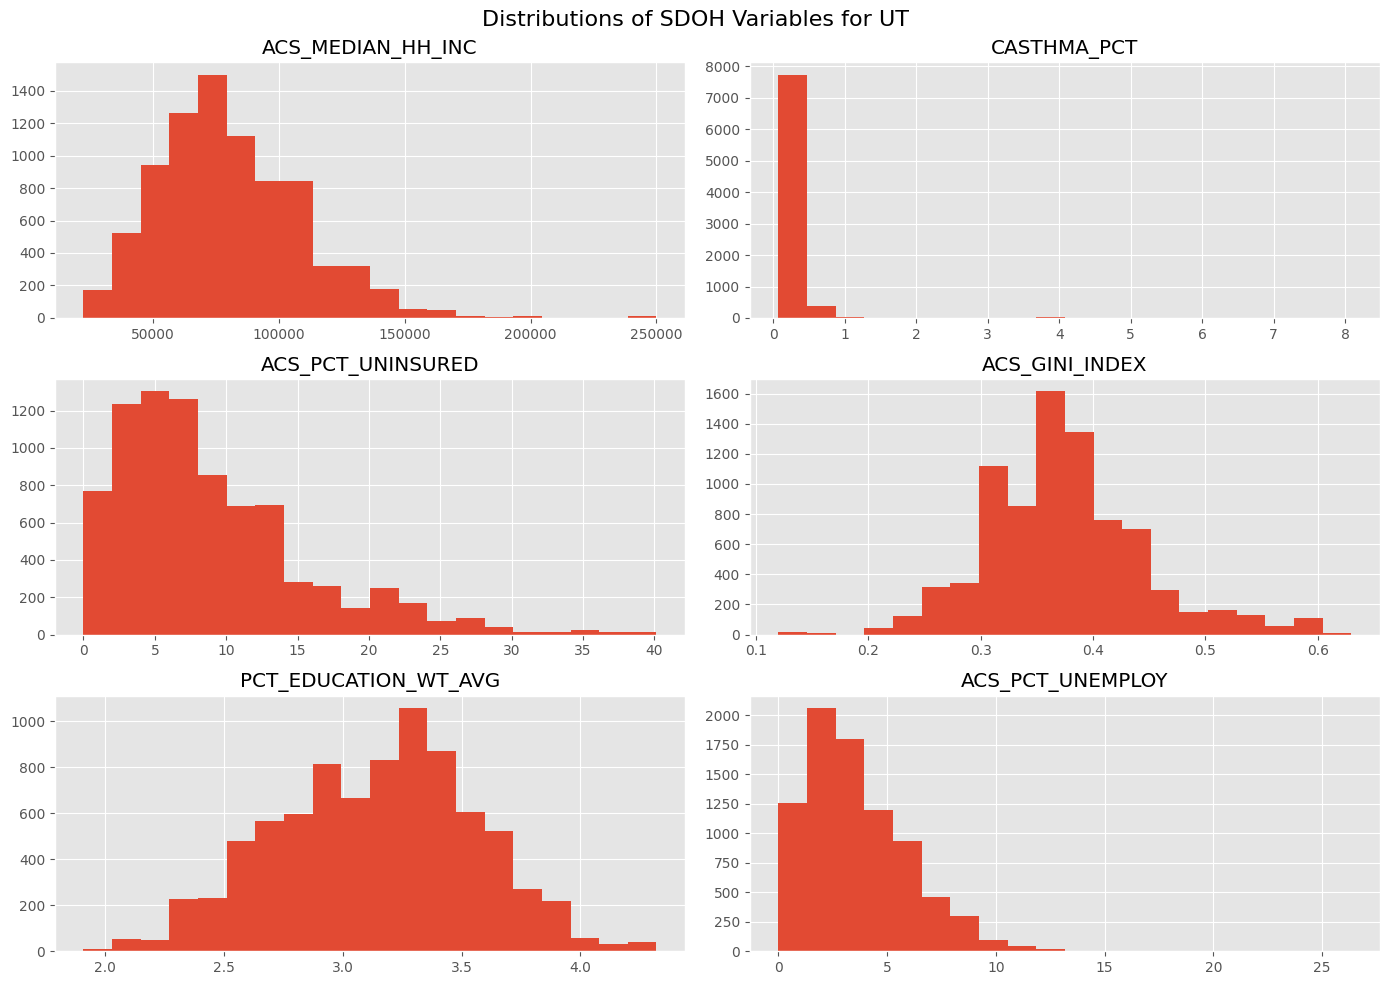

In [8]:
# Distributions of some SDOH Variables

sdoh_columns = [
    "ACS_MEDIAN_HH_INC",
    "CASTHMA_PCT",
    "ACS_PCT_UNINSURED",
    "ACS_GINI_INDEX",
    "PCT_EDUCATION_WT_AVG",
    "ACS_PCT_UNEMPLOY"
]

df[sdoh_columns].hist(bins=20, figsize=(14, 10), layout=(3, 2))
plt.suptitle("Distributions of SDOH Variables for UT", fontsize=16)
plt.tight_layout()
plt.show()

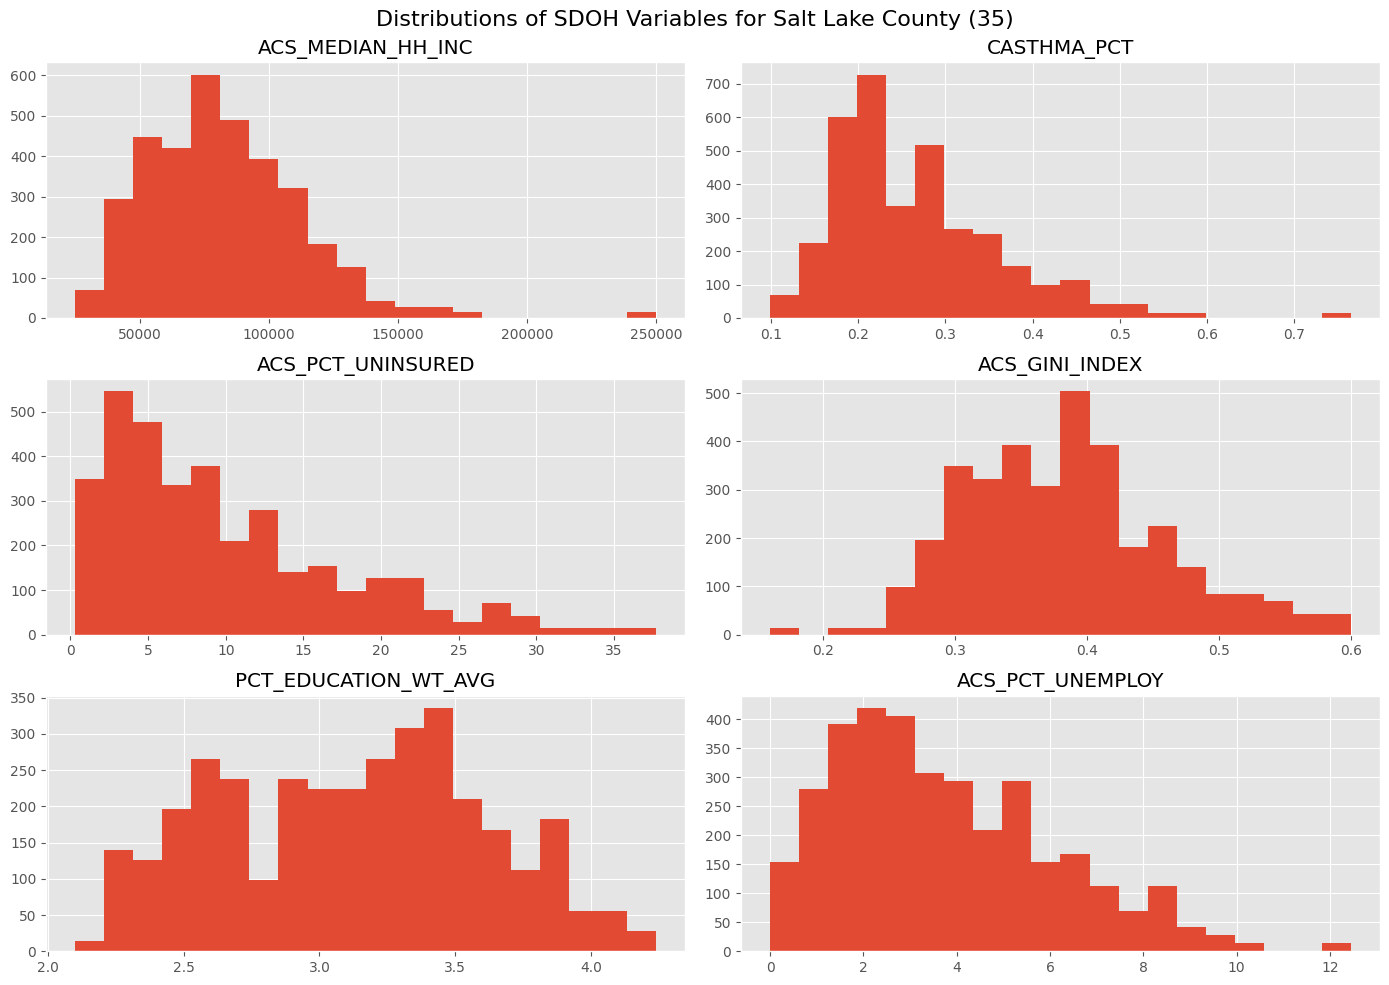

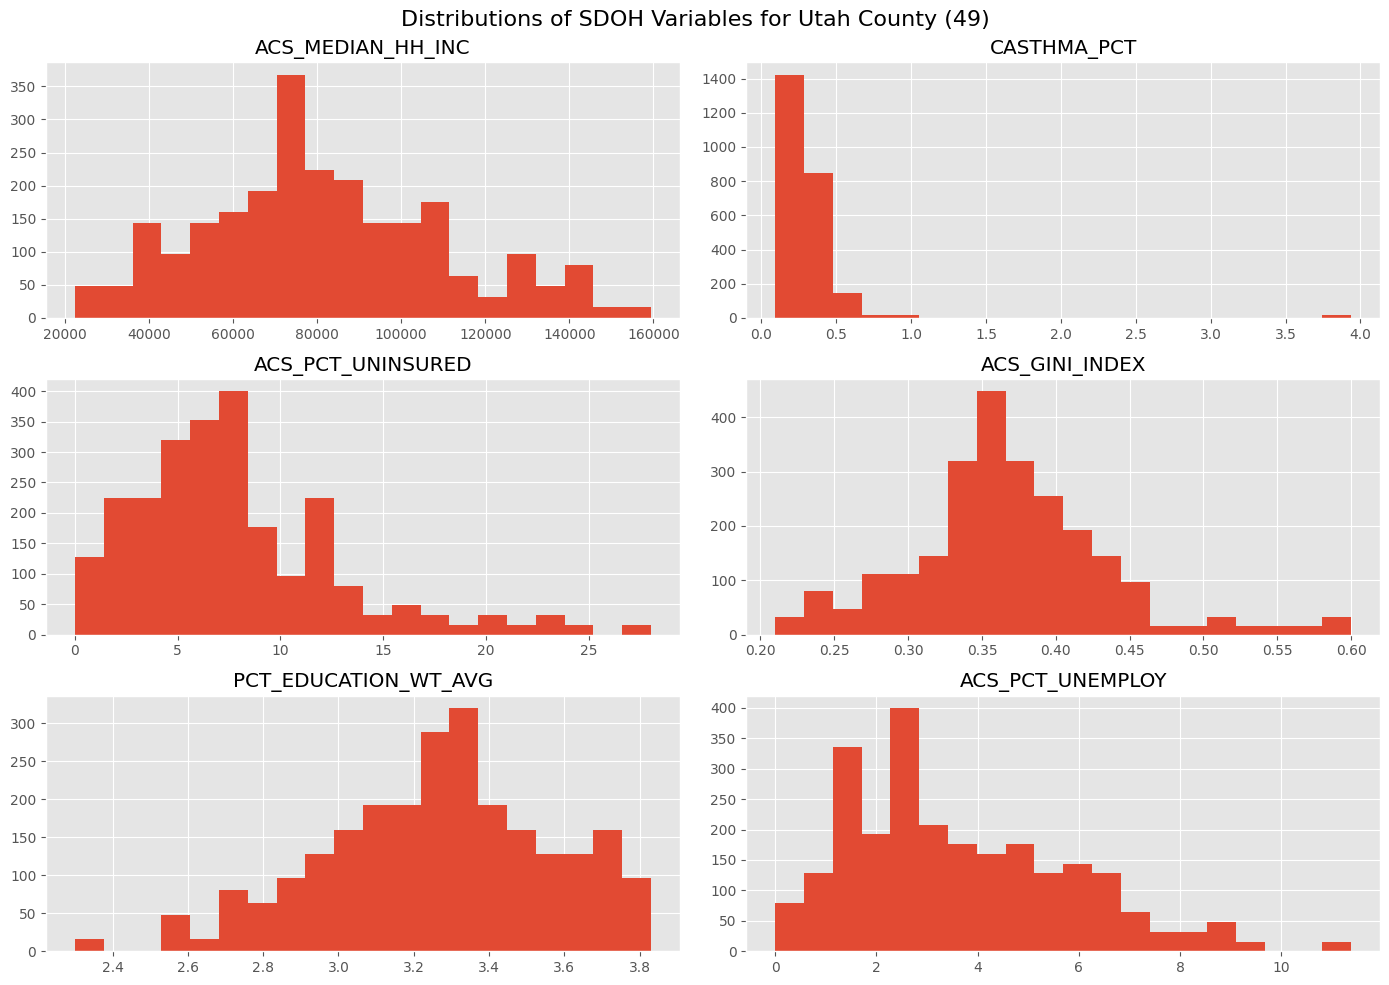

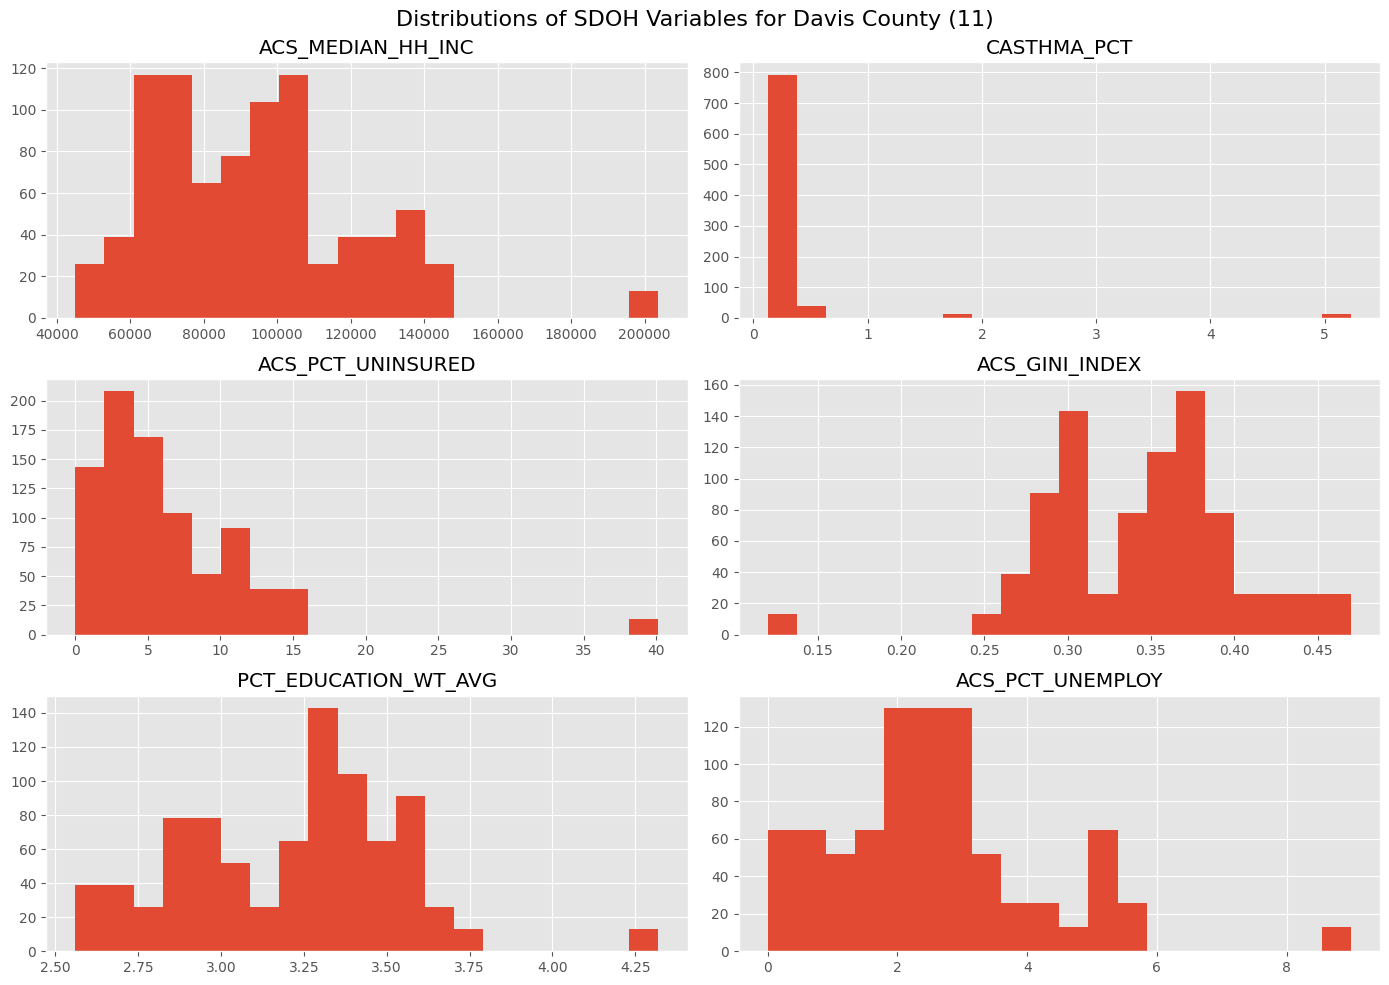

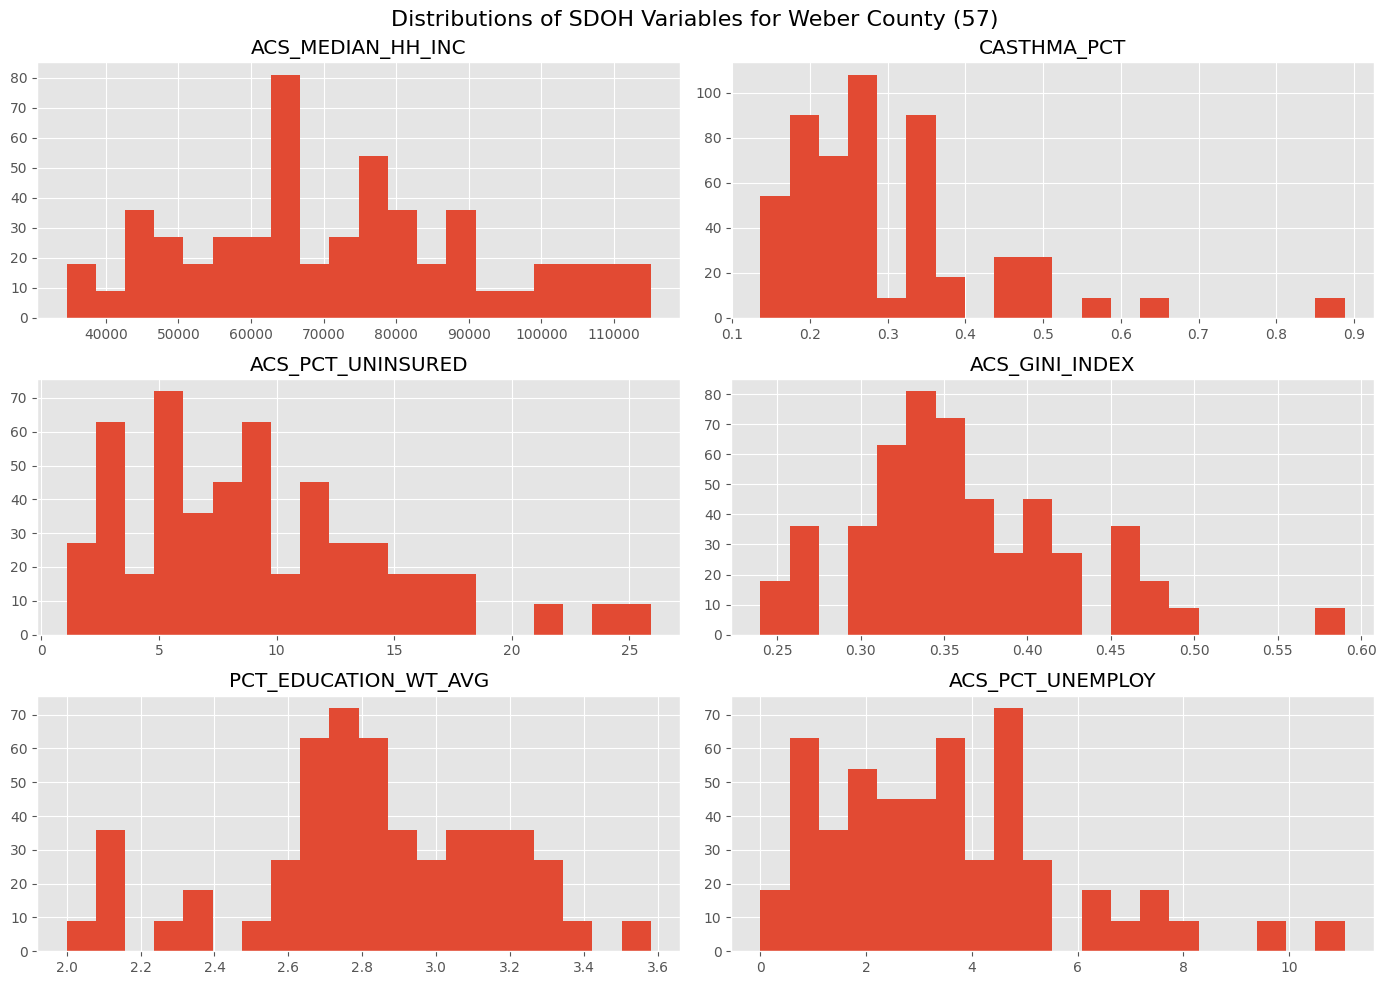

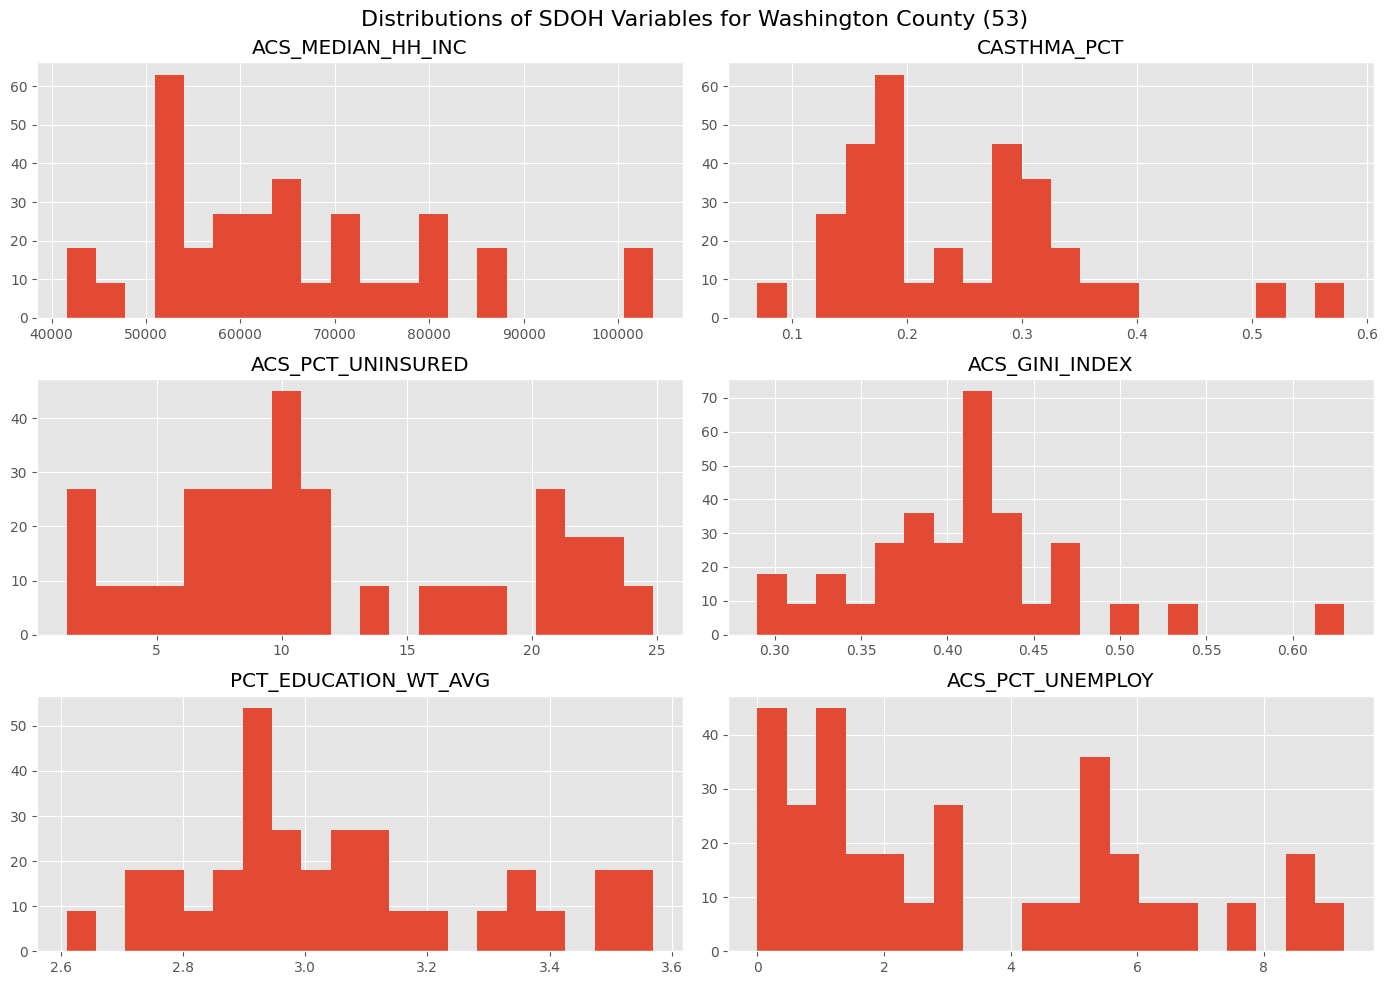

In [9]:
county_column = 'COUNTYFP20'  # The column containing county identifiers
counties_of_interest = [35, 49, 11, 57, 53]  # List of the desired counties

# Dictionary to map FIPS code to county name
county_name_mapping = {
    35: "Salt Lake County",
    49: "Utah County",
    11: "Davis County",
    57: "Weber County",
    53: "Washington County"
}

sdoh_columns = [
    "ACS_MEDIAN_HH_INC",
    "CASTHMA_PCT",
    "ACS_PCT_UNINSURED",
    "ACS_GINI_INDEX",
    "PCT_EDUCATION_WT_AVG",
    "ACS_PCT_UNEMPLOY"
]

for county_fips in counties_of_interest:
    county_df = df[df[county_column] == county_fips]  # Filter for the county

    if not county_df.empty:  # Check if there's data for the county
        county_df[sdoh_columns].hist(bins=20, figsize=(14, 10), layout=(3, 2))
        county_name = county_name_mapping.get(county_fips, f"County {county_fips}")
        plt.suptitle(f"Distributions of SDOH Variables for {county_name} ({county_fips})", fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data found for county FIPS: {county_fips}")

### SLC Example (coordinates)

In [10]:
# Example for SLC

#!pip install geopandas
import geopandas as gpd
from geopy.distance import geodesic
from shapely.geometry import Point

# Get coordinates: https://gps-coordinates.org/coordinate-converter.php

In [11]:
def get_sdoh_for_coordinates(latitude, longitude, geo_files_path="GeoFiles", sdoh_df=None):
    if sdoh_df is None:
        raise ValueError("An SDOH DataFrame must be provided.")
    if "GEOID20" not in sdoh_df.columns:
        raise ValueError("SDOH DataFrame must contain a 'GEOID20' column.")

    geo_dir = Path(geo_files_path)
    tracts_file = geo_dir / "CensusTracts2020.shp"

    try:
        if not tracts_file.exists():
            raise FileNotFoundError(f"Census Tracts shapefile not found: {tracts_file}")

        # Load census tract polygons
        tracts_gdf = gpd.read_file(tracts_file).to_crs("EPSG:4326")
        tracts_gdf["GEOID20"] = tracts_gdf["GEOID20"].astype(str)

        # Create point GeoDataFrame
        point = Point(longitude, latitude)
        point_gdf = gpd.GeoDataFrame({'input_point': [point]}, geometry='input_point', crs="EPSG:4326")

        # Spatial join: find which tract the point falls in
        joined = gpd.sjoin(point_gdf, tracts_gdf, how="left", predicate="within")

        if joined.empty or 'GEOID20' not in joined.columns or pd.isna(joined['GEOID20'].iloc[0]):
            print("No matching tract found for the provided coordinates.")
            return None

        # Match SDOH data
        geoid20 = str(joined['GEOID20'].iloc[0])
        sdoh_df["GEOID20"] = sdoh_df["GEOID20"].astype(str)

        # Drop duplicates just in case
        dupes = sdoh_df["GEOID20"].duplicated().sum()
        sdoh_df = sdoh_df.drop_duplicates(subset="GEOID20")

        match = sdoh_df[sdoh_df["GEOID20"] == geoid20]

        if match.empty:
            print(f"GEOID20 '{geoid20}' not found in SDOH DataFrame.")
            return None

        # Combine into a single Series
        spatial_row = joined.iloc[[0]].drop(columns='index_right').reset_index(drop=True)
        sdoh_row = match.reset_index(drop=True)

        # Remove overlapping columns before concat
        duplicated_cols = spatial_row.columns.intersection(sdoh_row.columns)
        sdoh_row = sdoh_row.drop(columns=duplicated_cols)

        merged = pd.concat([spatial_row, sdoh_row], axis=1)

        return merged.squeeze()

    except Exception as e:
        print(f"An error occurred: {e}")
        return None


In [12]:
latitude_slc = 40.763346
longitude_slc = -111.888106

sdoh_result = get_sdoh_for_coordinates(latitude_slc, longitude_slc, sdoh_df=df)
print(sdoh_result)

input_point                                            POINT (-111.888106 40.763346)
STATEFP20                                                                         49
COUNTYFP20                                                                       035
TRACTCE20                                                                     114000
GEOID20                                                                  49035114000
NAME20                                                                          1140
NAMELSAD20                                                              Census Tract
MTFCC20                                                                        G5020
FUNCSTAT20                                                                         S
ALAND20                                                                      3153173
AWATER20                                                                           0
INTPTLAT20                                                       